In [1]:
import pandas as pd
PATH = "00_data/"

In [2]:
products = pd.read_csv(f"{PATH}olist_products_dataset.csv", encoding="utf-8-sig")
customers = pd.read_csv(f"{PATH}olist_customers_dataset.csv", encoding="utf-8-sig")
geolocation = pd.read_csv(f"{PATH}olist_geolocation_dataset.csv", encoding="utf-8-sig")
order_items = pd.read_csv(f"{PATH}olist_order_items_dataset.csv", encoding="utf-8-sig")
payments = pd.read_csv(f"{PATH}olist_order_payments_dataset.csv", encoding="utf-8-sig")
reviews = pd.read_csv(f"{PATH}olist_order_reviews_dataset.csv", encoding="utf-8-sig")
orders = pd.read_csv(f"{PATH}olist_orders_dataset.csv", encoding="utf-8-sig")
sellers = pd.read_csv(f"{PATH}olist_sellers_dataset.csv", encoding="utf-8-sig")
category_name = pd.read_csv(f"{PATH}product_category_name_translation.csv", encoding="utf-8-sig")

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers["customer_unique_id"]

0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: object

In [5]:
# 컬럼에 중복되는 값이 존재 => 최대 17개까지 출력
# 사용자를 식별하기 위한 고유 ID

customers["customer_unique_id"].value_counts().max()

17

In [6]:
# 중복이 한 개도 없음
# 주문이 발생할 때마다 신규로 생성되는 고객 ID

customers["customer_id"].value_counts().max()

1

In [8]:
customers["customer_id"].nunique()

99441

In [9]:
customers["customer_unique_id"].nunique()

96096

In [10]:
# 지금까지 실제 구매한 고객 수 : 96,096명

In [11]:
# 2. 고객은 주로 어디에 거주하는가? : san paulo

In [12]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
customers_location = customers.groupby("customer_city")["customer_unique_id"].nunique().sort_values(ascending=False)

customers_location.head(20)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
niteroi                    811
santo andre                769
osasco                     717
santos                     692
goiania                    671
sao jose dos campos        666
fortaleza                  643
sorocaba                   610
recife                     590
jundiai                    547
Name: customer_unique_id, dtype: int64

In [30]:
customers_location = customers_location.head(20)

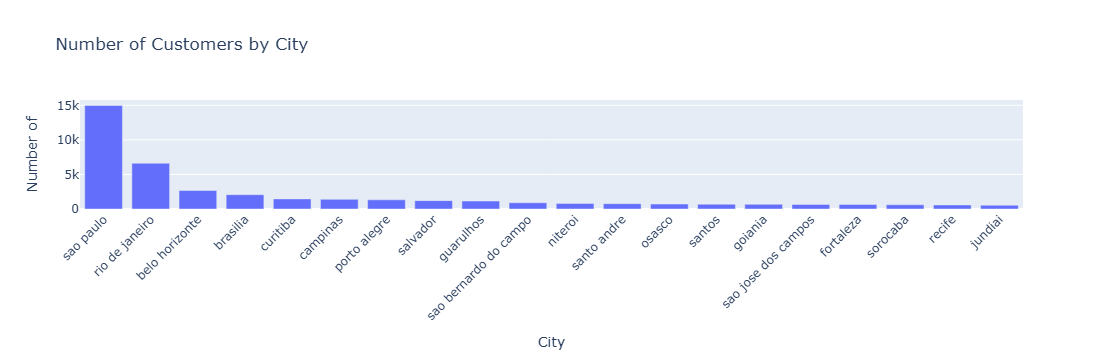

In [31]:
import plotly.express as px

fig = px.bar(
    x=customers_location.index,
    y=customers_location.values,
    title = "Number of Customers by City",
    labels = {"x":"City","y":"Number of "}
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [32]:
top20_customer_locations = customers_location.index
top20_customer_locations

Index(['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba',
       'campinas', 'porto alegre', 'salvador', 'guarulhos',
       'sao bernardo do campo', 'niteroi', 'santo andre', 'osasco', 'santos',
       'goiania', 'sao jose dos campos', 'fortaleza', 'sorocaba', 'recife',
       'jundiai'],
      dtype='object', name='customer_city')

In [34]:
for index, location in enumerate(top20_customer_locations) :
    print("TOP", index+1 , location)

TOP 1 sao paulo
TOP 2 rio de janeiro
TOP 3 belo horizonte
TOP 4 brasilia
TOP 5 curitiba
TOP 6 campinas
TOP 7 porto alegre
TOP 8 salvador
TOP 9 guarulhos
TOP 10 sao bernardo do campo
TOP 11 niteroi
TOP 12 santo andre
TOP 13 osasco
TOP 14 santos
TOP 15 goiania
TOP 16 sao jose dos campos
TOP 17 fortaleza
TOP 18 sorocaba
TOP 19 recife
TOP 20 jundiai


In [39]:
# 3. 고객은 주로 어떤 결제방법을 사용할까?

In [37]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [40]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [44]:
payments = payments[payments["payment_type"] != 'not_defined']

In [45]:
payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [47]:
payment_type_count = payments.groupby("payment_type")["order_id"].nunique().sort_values(ascending=False)
payment_type_count

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

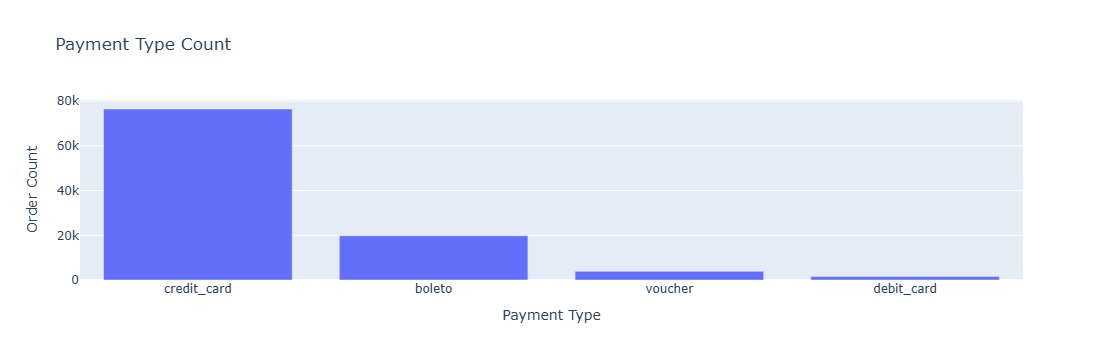

In [48]:
import plotly.express as px

fig = px.bar(
    x=payment_type_count.index,
    y=payment_type_count.values,
    title = "Payment Type Count",
    labels = {"x":"Payment Type","y":"Order Count "}
)

fig.show()

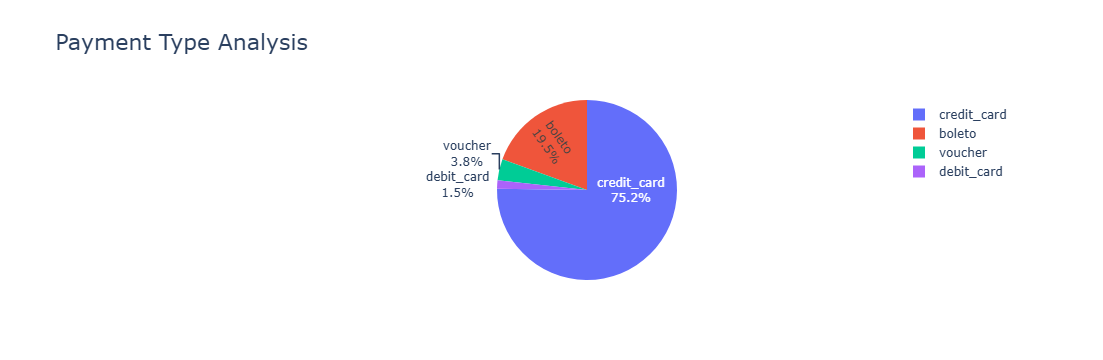

In [55]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels = payment_type_count.index,
        values = payment_type_count.values,
        textinfo = "label+percent",
        insidetextorientation = "radial"
    )
)

fig.update_layout({
    "title" : {
        "text":"Payment Type Analysis",
        "font":{
            "size":22
        }
    }
})

fig.show()

In [56]:
# 4. 월 평균 거래금액은 얼마일까?

In [3]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
orders = orders.dropna()

In [8]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [68]:
orders["order_id"].value_counts().max()

1

In [69]:
payments["order_id"].value_counts().max()

29

In [11]:
payments = payments.groupby("order_id").sum()

In [78]:
payments

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04
...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,boleto,1,343.40
fffcd46ef2263f404302a634eb57f7eb,1,boleto,1,386.53
fffce4705a9662cd70adb13d4a31832d,1,credit_card,3,116.85


In [12]:
payments[payments.index == "fa65dad1b0e818e3ccc5cb0e39231352"]

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
fa65dad1b0e818e3ccc5cb0e39231352,435,vouchervouchervouchervouchervouchervouchervouc...,29,457.99


In [83]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   payment_sequential    99437 non-null  int64  
 1   payment_type          99437 non-null  object 
 2   payment_installments  99437 non-null  int64  
 3   payment_value         99437 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [13]:
# merged_order = pd.merge(orders, payments, on="order_id", how = "left")
merged_order = pd.merge(orders, payments, on="order_id")

In [14]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_type                   96460 non-null  object 
 10  payment_installments           96460 non-null  int64  
 11  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usag

In [15]:
merged_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,6,credit_cardvouchervoucher,3,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,1,28.62


In [16]:
# 현 데이터에서는 날짜가 특정한 기준에 따라 월별 정리되지 않은 상황
# 특정 월별 집합
# pandas에서는 날짜와 관련 타입 정의 -> 날짜타입을 사용할 수만 있다면, 해당 타입에서 쓸 수 있는 함수, 속성 => 특정 월별 집합

In [18]:
import pandas as pd

df = pd.DataFrame({"order":[
    "2020-01-01 07:10:00",
    "2020-01-08 07:20:00",
    "2020-02-20 11:20:00",
    "2020-02-20 04:40:50",
    "2020-02-28 12:10:20",
    "2019-01-01 17:23:50",
    "2020-06-20 22:27:50"
]})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   order   7 non-null      object
dtypes: object(1)
memory usage: 188.0+ bytes


In [ ]:
# 문자열 형태의 데이터타입 (object) -> 시간 타입 (datetime64)
# 2025-01-16 = 25-01-16 = 25-1-16
# time25"01'01 twentyfive,,,
# to_datetime(Series 변수 = order, format = , errors = )
# ignore : 무시, raise : 출력, coerce : NaT 결측치 값으로 변경 후 실행

%y : 연도를 축약해서 2자리로
%Y : 연도를 축약하지 않은 상태 4자리로
%m : 월을 2자리로
%d : 일을 2자리로
%H : 24시간을 기준 00~23
$M : 분을 2자리로
$S : 초를 2자리로

In [22]:
pd.to_datetime(df["order"], format="%Y-%m-%d %H:%M:%S", errors="raise")

0   2020-01-01 07:10:00
1   2020-01-08 07:20:00
2   2020-02-20 11:20:00
3   2020-02-20 04:40:50
4   2020-02-28 12:10:20
5   2019-01-01 17:23:50
6   2020-06-20 22:27:50
Name: order, dtype: datetime64[ns]

In [23]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_type                   96460 non-null  object 
 10  payment_installments           96460 non-null  int64  
 11  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usag

In [24]:
merged_order["order_purchase_timestamp"] = pd.to_datetime(merged_order["order_purchase_timestamp"], format="%Y-%m-%d %H:%M:%S", errors="raise")

In [25]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96460 non-null  object        
 1   customer_id                    96460 non-null  object        
 2   order_status                   96460 non-null  object        
 3   order_purchase_timestamp       96460 non-null  datetime64[ns]
 4   order_approved_at              96460 non-null  object        
 5   order_delivered_carrier_date   96460 non-null  object        
 6   order_delivered_customer_date  96460 non-null  object        
 7   order_estimated_delivery_date  96460 non-null  object        
 8   payment_sequential             96460 non-null  int64         
 9   payment_type                   96460 non-null  object        
 10  payment_installments           96460 non-null  int64         
 11  payment_value  

In [26]:
merged_order_payment_date = merged_order[["order_purchase_timestamp", "payment_value"]].copy()

In [27]:
merged_order_payment_date

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,38.71
1,2018-07-24 20:41:37,141.46
2,2018-08-08 08:38:49,179.12
3,2017-11-18 19:28:06,72.20
4,2018-02-13 21:18:39,28.62
...,...,...
96455,2017-03-09 09:54:05,85.08
96456,2018-02-06 12:58:58,195.00
96457,2017-08-27 14:46:43,271.01
96458,2018-01-08 21:28:27,441.16


In [28]:
merged_order_payment_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  96460 non-null  datetime64[ns]
 1   payment_value             96460 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [29]:
merged_order_payment_date = merged_order_payment_date.set_index("order_purchase_timestamp")

In [30]:
merged_order_payment_date

,payment_value
order_purchase_timestamp,
2017-10-02 10:56:33,38.71
2018-07-24 20:41:37,141.46
2018-08-08 08:38:49,179.12
2017-11-18 19:28:06,72.20
2018-02-13 21:18:39,28.62
...,...
2017-03-09 09:54:05,85.08
2018-02-06 12:58:58,195.00
2017-08-27 14:46:43,271.01


In [31]:
# 일별 나눠져있는 날짜 -> 월별
# groupby (중복해서 작성된 요소를 하나의 그룹으로 합칠 수 있음)

In [32]:
# groupby > Grouper (*세부적으로 그룹의 조건 생성 적용)
# 데이터프레임.groupby(pd.Grouper(key="그룹화하려고하는 컬럼명", freq="세부기준"))

ME : 월간
QE : 분기
YE : 연간
D : 일일
h : 시간
min : 분당
S : 초당

In [39]:
merged_order_payment_date = merged_order_payment_date.reset_index()

In [40]:
merged_order_payment_date

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,38.71
1,2018-07-24 20:41:37,141.46
2,2018-08-08 08:38:49,179.12
3,2017-11-18 19:28:06,72.20
4,2018-02-13 21:18:39,28.62
...,...,...
96455,2017-03-09 09:54:05,85.08
96456,2018-02-06 12:58:58,195.00
96457,2017-08-27 14:46:43,271.01
96458,2018-01-08 21:28:27,441.16


In [43]:
merged_order_payment_month = merged_order_payment_date.groupby(pd.Grouper(key="order_purchase_timestamp",freq="ME")).sum()

In [46]:
merged_order_payment_month

,payment_value
order_purchase_timestamp,
2016-10-31,47271.20
2016-11-30,0.00
2016-12-31,19.62
2017-01-31,127430.74
2017-02-28,269458.98
2017-03-31,414369.39
2017-04-30,390952.18
2017-05-31,566872.73
2017-06-30,490225.60


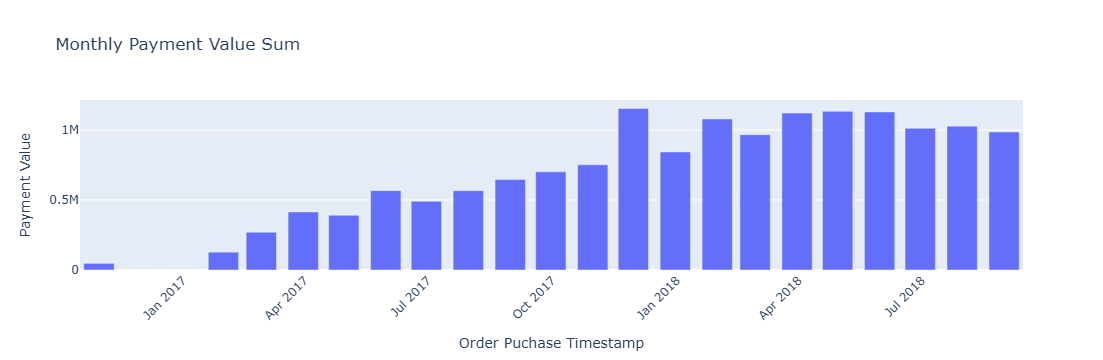

In [49]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_month.index,
    y=merged_order_payment_month["payment_value"],
    title="Monthly Payment Value Sum",
    labels = {
        "x":"Order Puchase Timestamp",
        "y":"Payment Value"
    }
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [50]:
merged_order_payment_month["payment_value"].mean()

np.float64(670420.9934782608)

In [51]:
merged_order_payment_month["payment_value"]

order_purchase_timestamp
2016-10-31      47271.20
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     127430.74
2017-02-28     269458.98
2017-03-31     414369.39
2017-04-30     390952.18
2017-05-31     566872.73
2017-06-30     490225.60
2017-07-31     566403.93
2017-08-31     646000.61
2017-09-30     700976.01
2017-10-31     751140.27
2017-11-30    1153393.22
2017-12-31     843199.17
2018-01-31    1078606.86
2018-02-28     966554.97
2018-03-31    1120678.00
2018-04-30    1132933.95
2018-05-31    1128836.69
2018-06-30    1011561.35
2018-07-31    1027383.10
2018-08-31     985414.28
Freq: ME, Name: payment_value, dtype: float64

In [53]:
merged_order_payment_month["payment_value"][3:].mean()

np.float64(768619.6014999999)

In [54]:
merged_order_payment_month[merged_order_payment_month["payment_value"] == merged_order_payment_month["payment_value"].max()]

,payment_value
order_purchase_timestamp,
2017-11-30,1153393.22


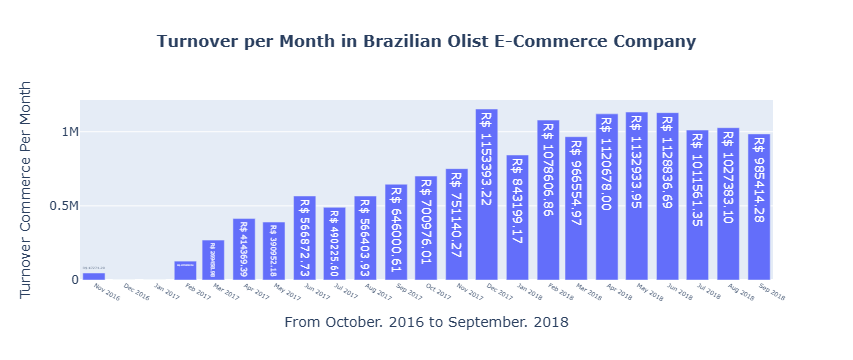

In [72]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month.index,
        y=merged_order_payment_month["payment_value"],
        text=merged_order_payment_month["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b>",
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From October. 2016 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        }
    }
)

fig.show()

In [73]:
merged_order_payment_month_from2017 = merged_order_payment_month[merged_order_payment_month.index >"2017-01-01"]

In [74]:
merged_order_payment_month_from2017

,payment_value
order_purchase_timestamp,
2017-01-31,127430.74
2017-02-28,269458.98
2017-03-31,414369.39
2017-04-30,390952.18
2017-05-31,566872.73
2017-06-30,490225.60
2017-07-31,566403.93
2017-08-31,646000.61
2017-09-30,700976.01


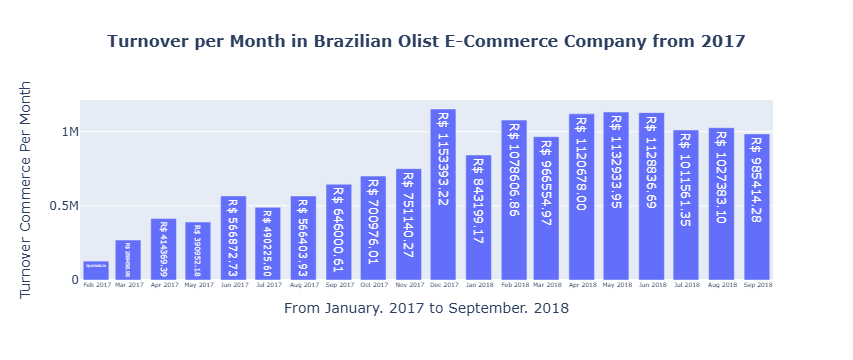

In [75]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month_from2017.index,
        y=merged_order_payment_month_from2017["payment_value"],
        text=merged_order_payment_month_from2017["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company from 2017</b>",
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From January. 2017 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        }
    }
)

fig.show()

In [76]:
import plotly.io as pio

pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

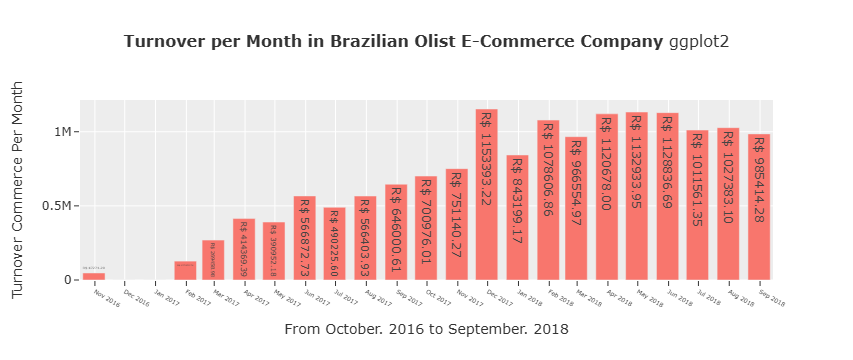

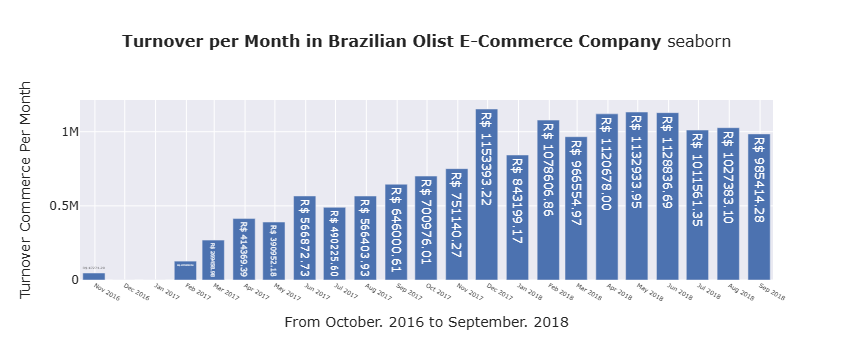

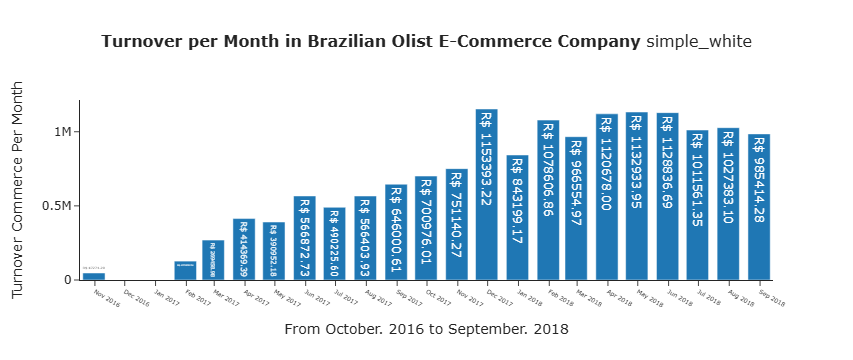

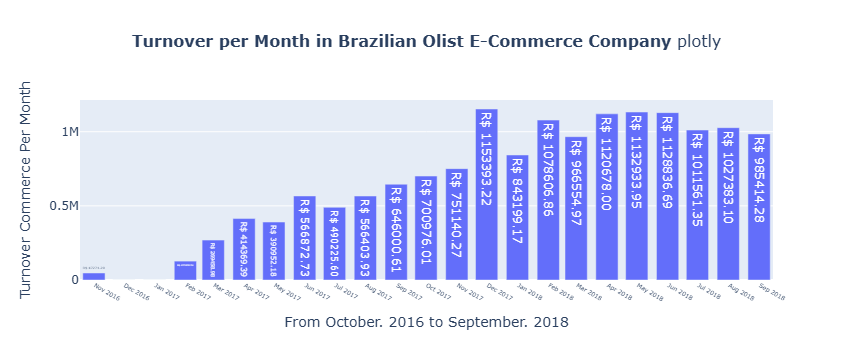

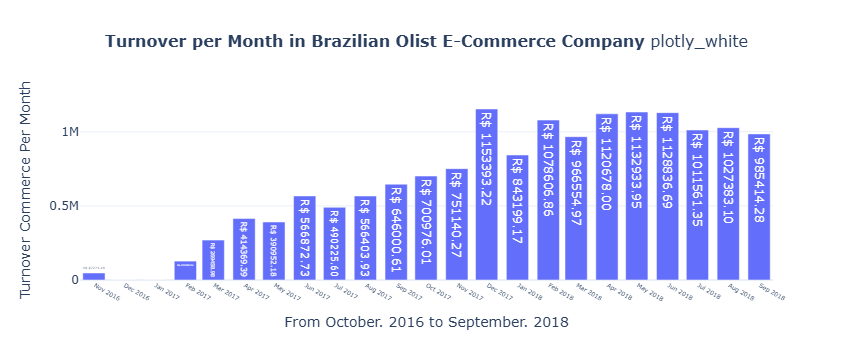

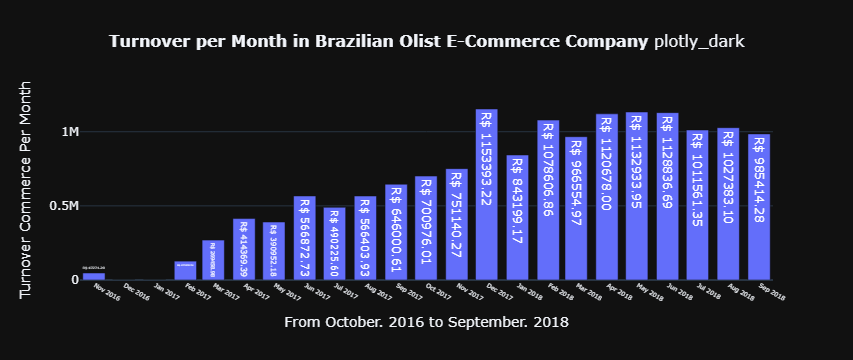

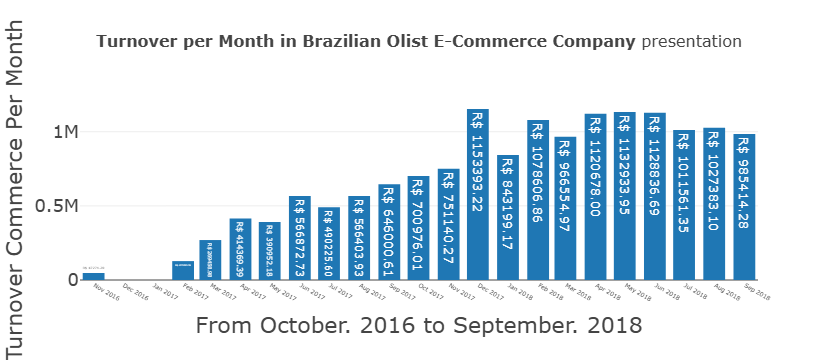

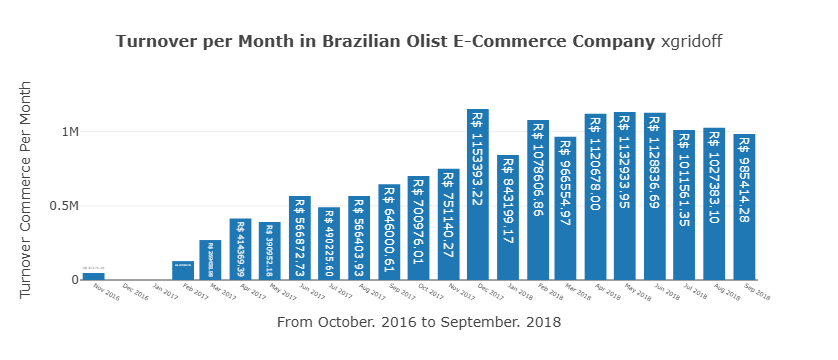

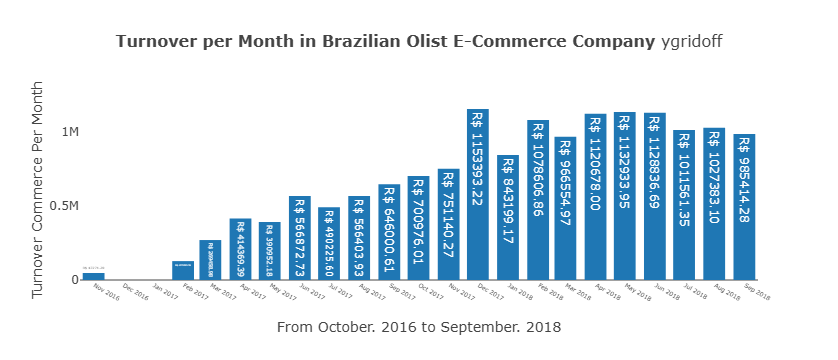

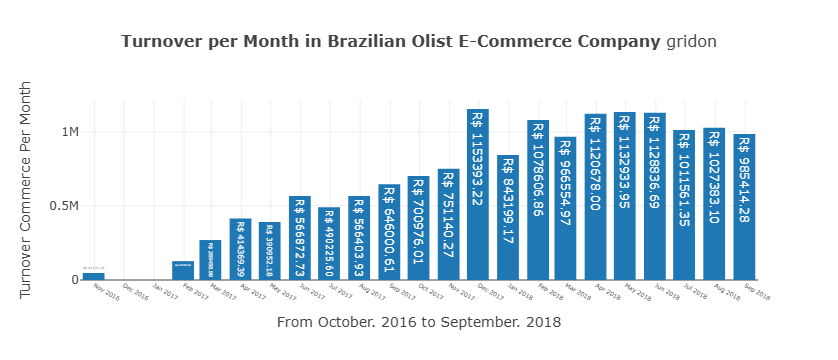

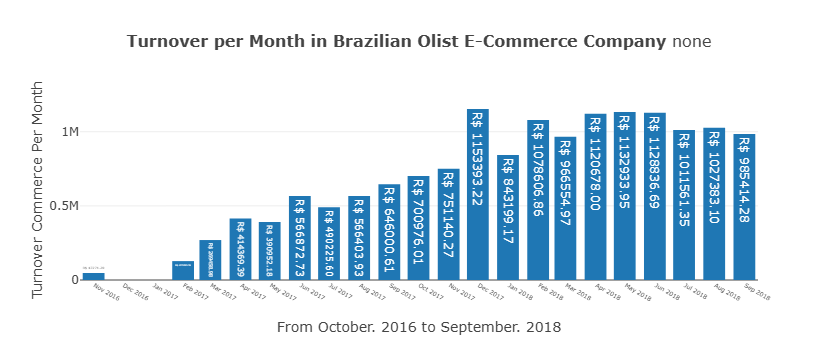

In [80]:
import plotly.graph_objects as go

for template in pio.templates :
    fig = go.Figure()
    
    fig.add_trace(
        go.Bar(
            x=merged_order_payment_month.index,
            y=merged_order_payment_month["payment_value"],
            text=merged_order_payment_month["payment_value"],
            textposition="auto",
            texttemplate="R$ %{y:.2f}"
        )
    )
    
    fig.update_layout(
        {
            # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
            "title":{
                "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b> " + template,
                "x":0.5,
                "y":0.9,
                "font": {
                    "size":16
                },
                    },
            "xaxis": {
                "title":"From October. 2016 to September. 2018",
                "showticklabels":True,
                "dtick":"M1",
                "tickfont":{
                    "size":6
                }
            },
            "yaxis": {
                "title" : "Turnover Commerce Per Month"
            },
            "template" : template
        }
    )

    fig.show()

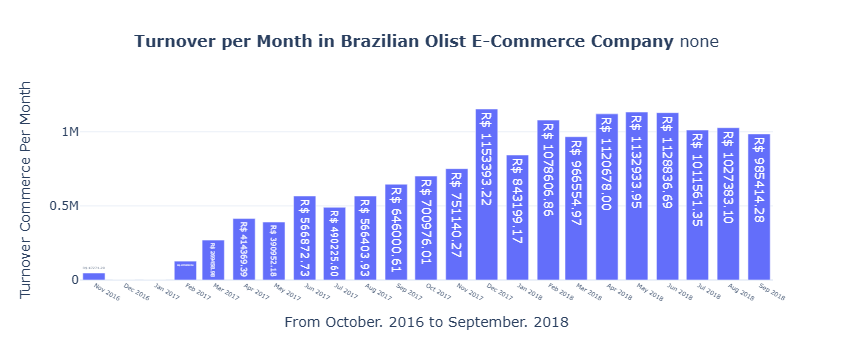

In [84]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month.index,
        y=merged_order_payment_month["payment_value"],
        text=merged_order_payment_month["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b> " + template,
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From October. 2016 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        },
        "template" : "plotly_white"
    }
)

fig.show()

In [86]:
colors = ["#03588c"]*len(merged_order_payment_month_from2017.index)
colors[10] = "#f24472"
colors

['#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#f24472',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c']